In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cblearn.embedding import SOE
from sklearn.model_selection import validation_curve

from analyse_embeddings import SUBJ_LIST, SUBJ_NAME, get_trial_df, preprocess_queries
import seaborn as sns
import matplotlib

sns.set_theme(style="whitegrid")
font = {'family' : 'sans-serif',
        #'fontname': 'Helvetica',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)
colors = sns.color_palette("gray", 2)
colors

[(0.3333333333333333, 0.3333333333333333, 0.3333333333333333),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666)]

In [8]:
def plot_validation_curve(queries, label):
    param_range = [1, 2, 3]
    lw = 2
    
    train_scores, test_scores = validation_curve(SOE(n_components=1, n_init=10), queries, y=None, cv=10, n_jobs=-1,
                                                 param_name="n_components", param_range=param_range)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.title(f"Subject {label}")
    plt.plot(
        param_range, train_scores_mean, label="Training", color=colors[0], lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color=colors[0],
        lw=lw,
    )
    plt.plot(
        param_range, test_scores_mean, label="Validation", color=colors[1], lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color=colors[1],
        lw=lw,
    )

    return train_scores_mean , test_scores_mean

Starting with subject: 3
Starting with subject: 4
Starting with subject: 5
Starting with subject: 7
Starting with subject: 8
Starting with subject: 9
Starting with subject: 10
Starting with subject: 11
Starting with subject: 12
Starting with subject: 13
Starting with subject: 14
Starting with subject: 15
Starting with subject: 16


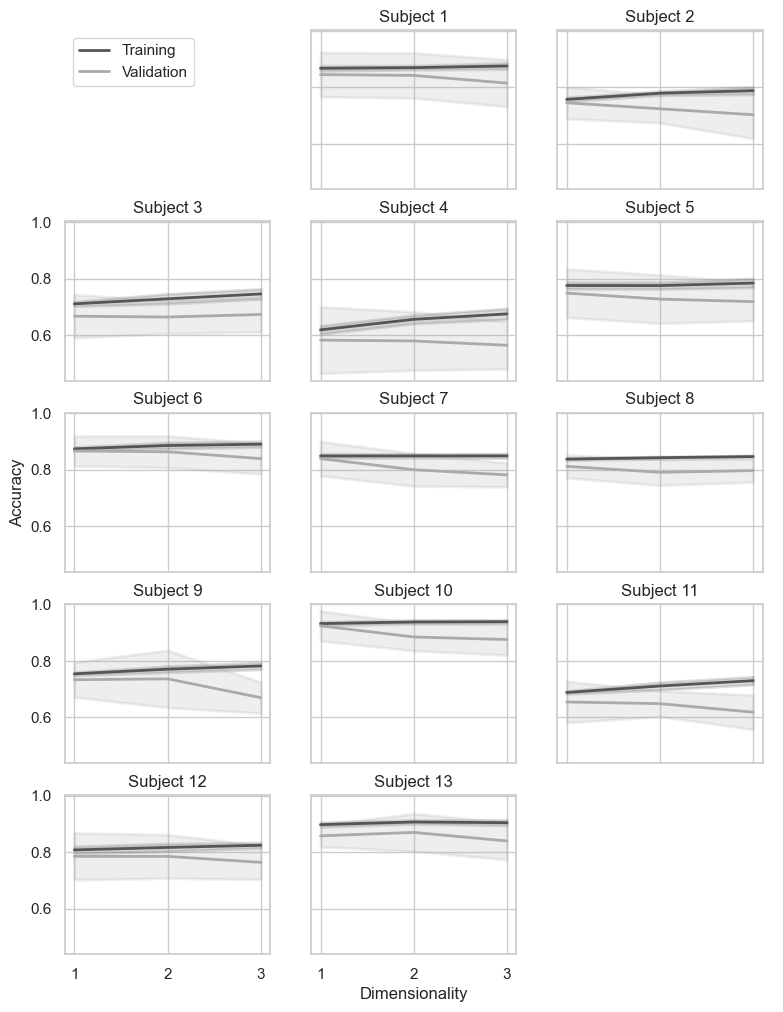

In [13]:
fig, axs = plt.subplots(int(np.ceil(len(SUBJ_LIST) / 3)), 3, sharex=True, sharey=True, figsize=(9, 12))
# big axis for common labels
bigax = fig.add_subplot(111, frameon=False)
#bigax.set_xticks([])
#bigax.set_yticks([])
bigax.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")

combined_train_scores = np.empty((len(SUBJ_LIST),3))
combined_test_scores = np.empty((len(SUBJ_LIST),3))
c = 0

for subj, ax in zip(SUBJ_LIST, axs.flat[1:]):
    print("Starting with subject: " + str(subj))
    data = get_trial_df(subj)
    objects, queries = preprocess_queries(data)
    plt.sca(ax)
    train_scores_mean , test_scores_mean = plot_validation_curve(queries, SUBJ_NAME[subj])
    combined_train_scores[c,:] = train_scores_mean
    combined_test_scores[c,:] = test_scores_mean
    c +=1
fig.delaxes(axs.flat[0])
for ax in axs.flat[(1 + len(SUBJ_LIST)):]:
    fig.delaxes(ax)
handles, labels = axs.flat[1].get_legend_handles_labels()
bigax.legend(handles=handles, labels=labels, loc='upper left')
fig.savefig('embedding_dimensionality.pdf')
plt.show()

(1.0, 3.0)

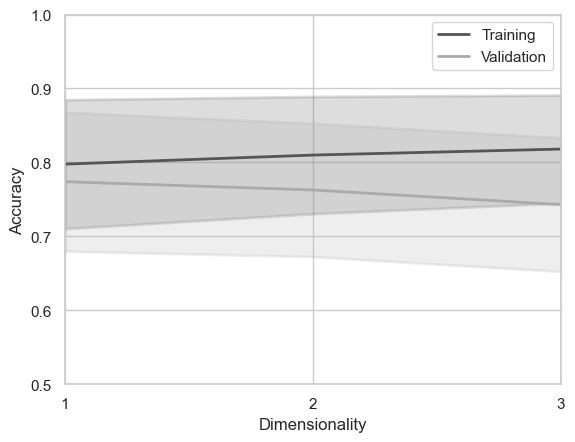

In [25]:
param_range = [1, 2, 3]
lw = 2

train_mean_mean = np.mean(combined_train_scores, axis=0)
train_mean_std = np.std(combined_train_scores, axis=0)
test_mean_mean = np.mean(combined_test_scores, axis=0)
test_mean_std = np.std(combined_test_scores, axis=0)

plt.plot(param_range, train_mean_mean, label="Training", color=colors[0], lw=lw)
plt.fill_between(
    param_range,
    train_mean_mean - train_mean_std,
    train_mean_mean + train_mean_std,
    alpha=0.2,
    color=colors[0],
    lw=lw,
    )
plt.plot(
    param_range, test_mean_mean, label="Validation", color=colors[1], lw=lw
    )
plt.fill_between(
    param_range,
    test_mean_mean - test_mean_std,
    test_mean_mean + test_mean_std,
    alpha=0.2,
    color=colors[1],
    lw=lw,
    )

plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")
plt.ylim([0.5,1.0])
plt.legend()
plt.xticks([1,2,3])
plt.xlim([1,3])

(1.0, 3.0)

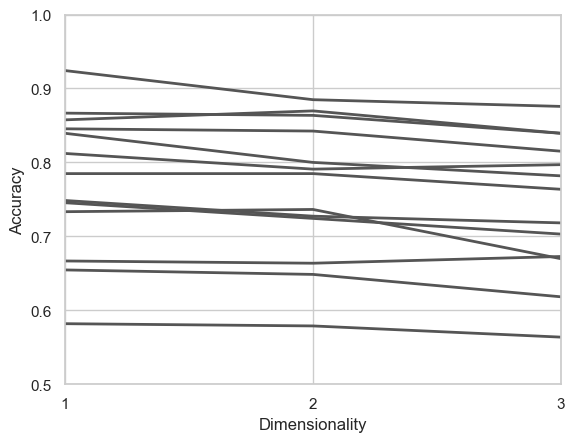

In [29]:
aram_range = [1, 2, 3]
lw = 2

plt.plot(param_range, combined_test_scores.transpose(), label="Training", color=colors[0], lw=lw)
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")
plt.ylim([0.5,1.0])
#plt.legend()
plt.xticks([1,2,3])
plt.xlim([1,3])